# A Project to evaluate the relationship between height and weight of students 

#### This is a simple linear regression project because of the measure of the data involved, and the number of the input and output variable.

#### Here, the height is the target variable 'y' while weight 'X' is the feature variable, and the data used was sourced from the Kaggle platform

In [2]:
# Loading the required libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read data into DataFrame

data = pd.read_csv('heigt_weight.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
## Explorating more information regarding the dataset.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


#### From the information above, the weight and height are of float datatype while the gender is of the string data type. The data is 10,000 in length, and has no missing value as indicated by the information above.



<AxesSubplot:xlabel='Weight', ylabel='Height'>

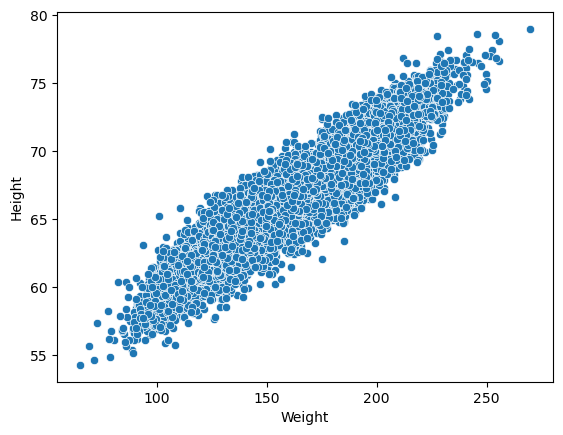

In [16]:
# Exploratory Data Analysis

sns.scatterplot(data=data, x='Weight', y='Height')


In [18]:
data.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


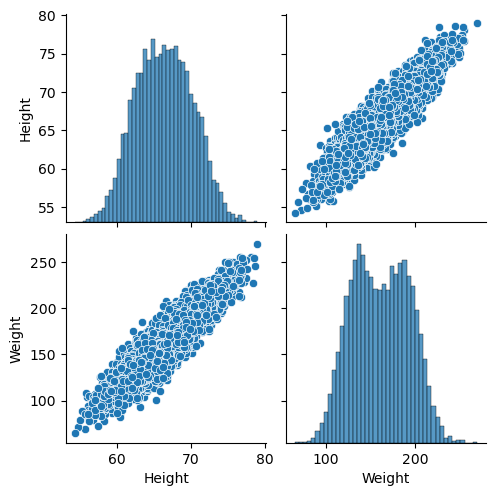

In [21]:
# Displaying the correlation and distribution of height and weight

sns.pairplot(data=data);

In [23]:
# Split dataset into Dependednt and Independent Features

X = data.drop(columns=['Height', 'Gender'])
y =  data['Height']
type(X)

pandas.core.frame.DataFrame

In [24]:
# Split the dataset into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
## Standardize the feature vriables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train  = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

c:\Users\obinn\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [25]:
# Loading the LinearRrgression Library

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_mean = data['Height'].mean()
y_mean_array = [y_mean] * len(X_train)

In [34]:
from sklearn.metrics import mean_absolute_error

mae_dummy = mean_absolute_error(y_train, y_mean_array)
mae_dummy

3.1673806791396153

In [35]:
y_pred = model.predict(X_test)

In [36]:
# Model evaluation using the Mean Absolute Error

mae_prediction = mean_absolute_error(y_test, y_pred)

mae_prediction

1.1600795829040496

<AxesSubplot:xlabel='Weight', ylabel='Height'>

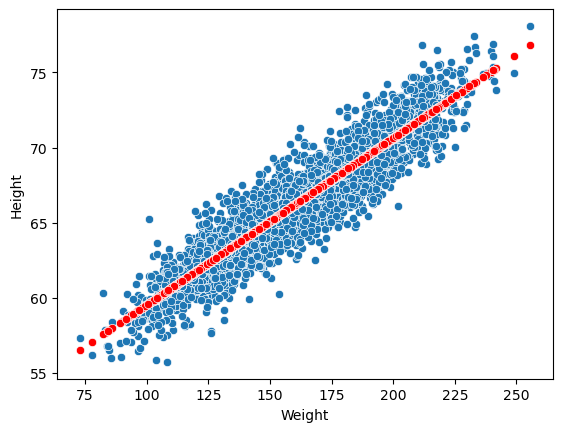

In [40]:
sns.scatterplot(x=X_test['Weight'], y=y_test)
sns.scatterplot(x=X_test['Weight'], y=y_pred, color='r')

In [41]:
# Standardize dataset